## Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

## Reading and displaying csv

In [17]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Visualization

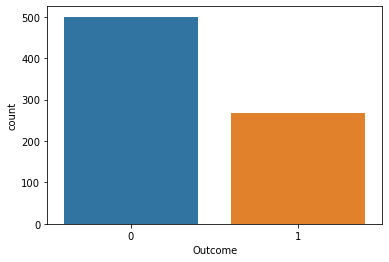

In [18]:
sns.countplot(x=data['Outcome'],label="count")
plt.show()

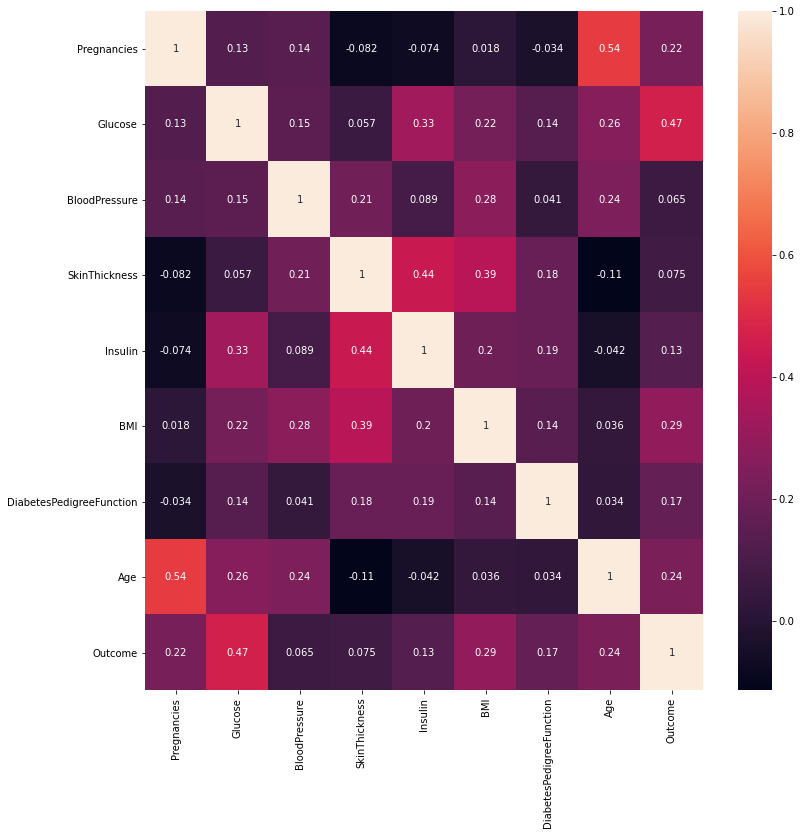

In [19]:
fig, ax = plt.subplots(figsize=(12.5,12.5))
ax = sns.heatmap(data.corr(), annot = True);

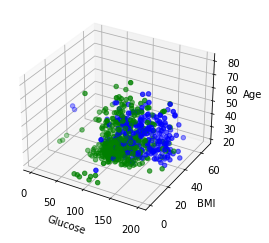

In [36]:
colour = []
for index, row in data.iterrows():
    if row['Outcome']==0:
        colour.append('green')
    else:
        colour.append('blue')

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.scatter(data['Glucose'], data['BMI'], data['Age'], c = colour)
plt.show()

## Splitting into input and outcome

In [21]:
X = data.iloc[: , :-1].values
print(X.shape)
Y = data.iloc[: , -1].values
print(Y.shape)

(768, 8)
(768,)


## Splitting into train and test

In [22]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.30)

## Standardisation

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Finding out value of K

0.7489177489177489
0.7056277056277056
k =  5


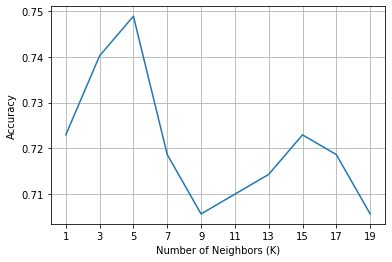

In [24]:
K = 20
n = int(K/2)
mean_acc = []
arr = []
for i in range(1,K,2):
    arr.append(i)

for i in arr:
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train,Y_train)
    y_pred=KNN.predict(X_test)
    mean_acc.append(metrics.accuracy_score(Y_test, y_pred))

plt.xticks(np.arange(1, 20, 2))
plt.plot(arr,mean_acc,markersize=10)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.grid()

print("k = ",np.argsort(mean_acc)[-1]*2+1)

## Training KNN model

In [25]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

## Predicting with KNN model

In [26]:
y_pred = KNN.predict(X_test)

## Confusion matrix

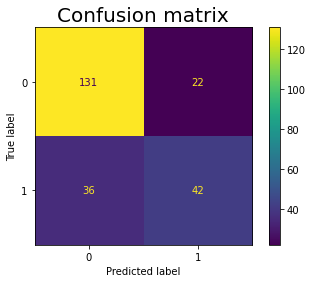

In [27]:
matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(KNN,X_test, Y_test)
plt.title("Confusion matrix",fontsize=20)
plt.show()

In [28]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.66      0.54      0.59        78

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



## Evaluation scores

In [29]:
matrix = confusion_matrix(Y_test, y_pred)

tp = matrix[1][1]
tn = matrix[0][0]
fp = matrix[0][1]
fn = matrix[1][0]
specificity = tn/(tn+fp)
fpr = 1-specificity
fnr = fn/(fn+tp)
npv = tn/(tn+fn)
fdr = fp/(fp+tp)
mcc=matthews_corrcoef(Y_test, y_pred)
print("specificity =",specificity)
print("fpr = ",fpr)
print("fnr = ",fnr)
print("npv = ",npv)
print("fdr = ",fdr)
print("mcc = ",mcc)

specificity = 0.8562091503267973
fpr =  0.14379084967320266
fnr =  0.46153846153846156
npv =  0.7844311377245509
fdr =  0.34375
mcc =  0.41704187818704247


## ROC Curve

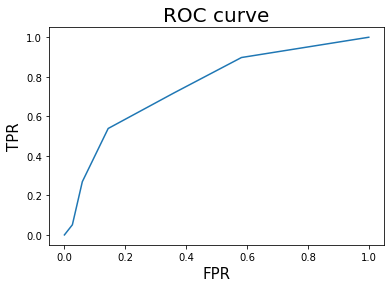

In [30]:
y_pred_proba = KNN.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.title('ROC curve',fontsize=20)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.show()